### PART 3 : COMPANY CLUSTERING CUSTOMERS

A company has gathered data about its customers and would like to identify si- milar clients, in order to propose relevant products to new clients, based on their features. This can be represented as a clustering problem

## 1. Data preparation

In [45]:
# We prepare the dataset using numpy and sklearn for metrics handling

import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

dataset = np.load('data.npy');

# We calculate the euclidean and cosine distances between all the points in the dataset
euclidean = dataset
cosine = metrics.pairwise_distances(dataset, metric='cosine')

# Import the algorithm dependencies
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## 2. Used clustering algorithms with euclidean distance

### Euclidean metric with Agglomerative clustering and KMeans

> For this case , we will find the best number of clusters as the KMeans algorithm is very sensitive to the number of clusters. We will use the elbow method to find the best number of clusters.

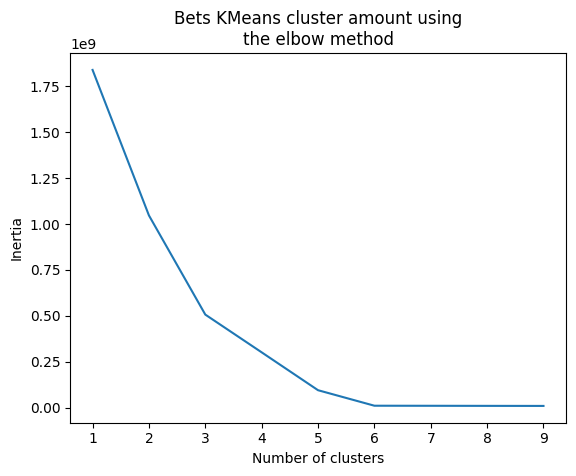

In [46]:
## Find optimal cluster amount for KMeans with euclidean metric
k_means_inertia = []

for n_cluster in range(1, 10):
    kmeans = KMeans(n_clusters=n_cluster, n_init='auto').fit(euclidean)
    k_means_inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), k_means_inertia)
plt.title('Bets KMeans cluster amount using\nthe elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Pick the best kmeans inertia
BEST_CLUSTER_AMOUNT = 6


Based on the elbow method, we can see that the best number of clusters is 6 as higher number of clusters does not improve the inertia and might be more computationally expensive.

### 2.1 Agglomerative clustering with Euclidian metric

> We will make the assumption that based on the KMeans results, the best number of clusters is also 6 for the Agglomerative clustering algorithm.

/Users/gabrielhuguenin-dumittan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


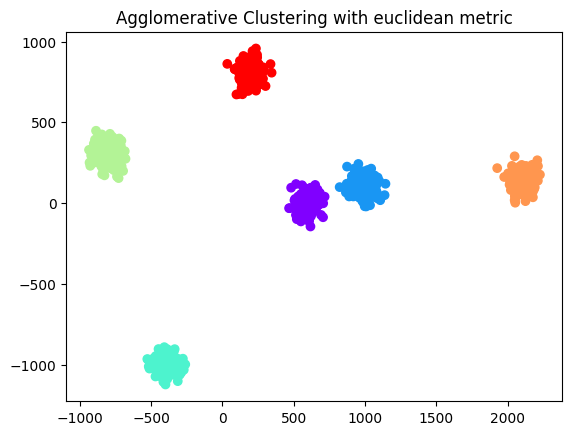

In [47]:
agglomerative = AgglomerativeClustering(n_clusters=BEST_CLUSTER_AMOUNT, affinity='euclidean', linkage='ward')

# We fit the data to the algorithm
agglomerative.fit_predict(euclidean)

# Visualize the results
plt.scatter(dataset[:,0], dataset[:,1], c=agglomerative.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering with euclidean metric')
plt.show()

### 2.2 KMeans with euclidean metric

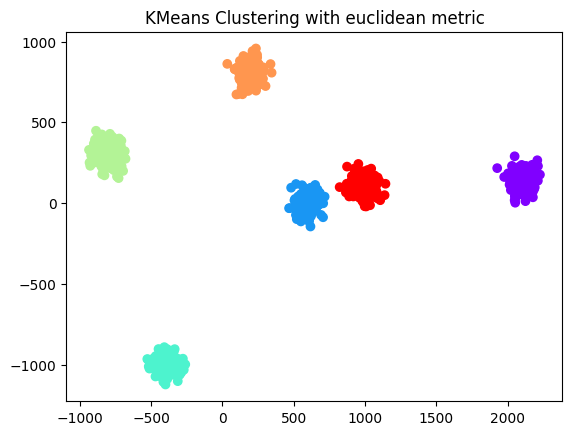

In [48]:
kmeans = KMeans(n_clusters=BEST_CLUSTER_AMOUNT, n_init='auto').fit_predict(euclidean)

# Visualize the results
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans, cmap='rainbow')
plt.title('KMeans Clustering with euclidean metric')
plt.show()

## 3. Used clustering algorithms with cosine distance

> We will again use the elbow method to find the best cluster amount for the cosine metric

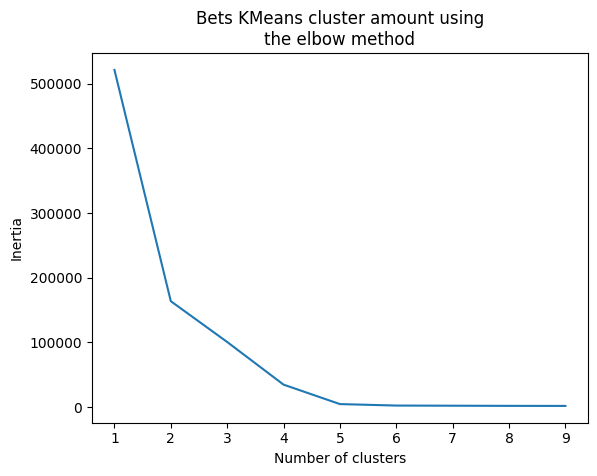

In [49]:
## Find optimal cluster amount for KMeans with cosine metric

k_means_inertia = []

for n_cluster in range(1, 10):
    kmeans = KMeans(n_clusters=n_cluster, n_init='auto').fit(cosine)
    k_means_inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), k_means_inertia)
plt.title('Bets KMeans cluster amount using\nthe elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

BEST_CLUSTER_AMOUNT = 5

Based on the elbow method, we can see that the best number of clusters is 5 with the cosine metric.

### 3.1 Agglomerative clustering with cosine metric

/Users/gabrielhuguenin-dumittan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/gabrielhuguenin-dumittan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


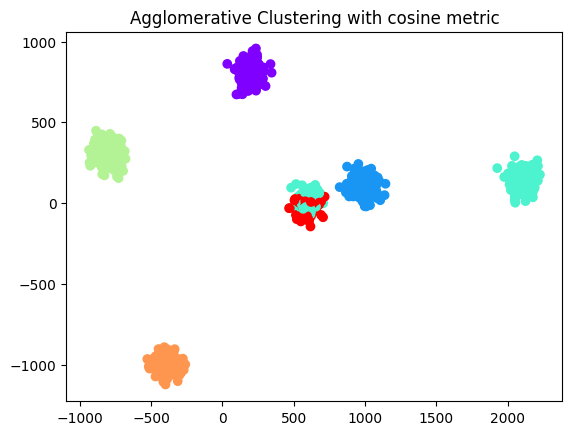

In [50]:
agglomerative = AgglomerativeClustering(n_clusters=BEST_CLUSTER_AMOUNT, affinity='cosine', linkage='complete')

# We fit the data to the algorithm
agglomerative.fit_predict(cosine)

# Visualize the results
plt.scatter(dataset[:,0], dataset[:,1], c=agglomerative.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering with cosine metric')
plt.show()

### 3.2 KMeans with cosine metric

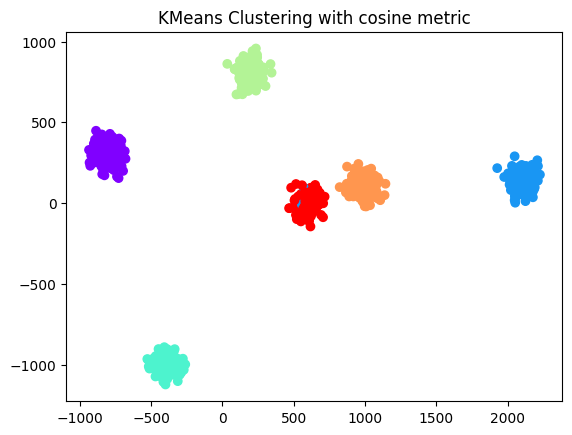

In [51]:
kmeans = KMeans(n_clusters=BEST_CLUSTER_AMOUNT, n_init='auto').fit_predict(cosine)

# Visualize the results
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans, cmap='rainbow')
plt.title('KMeans Clustering with cosine metric')
plt.show()

### Observations

The amount of clusters found by the KMeans and Agglomerative clustering algorithms are different for the two metrics. This is due to the fact that the two metrics are different. 

With one less cluster in the case of the cosine metric, one assumption can be that the cosine metric loses more information than the euclidean metric. This is due to the fact that the cosine metric is based on the angle between two vectors, and not on the distance between them. This means that two vectors with the same angle but different lengths will have the same cosine distance. This is not the case with the euclidean metric.

### Conclusion

Aside from the amount of clusters, the two metrics give similar results. The clusters are similar in terms of the features of the customers. This means that the cosine metric is a viable alternative to the euclidean metric for clustering problems.

